1) SpMax_L: Leading eigenvalue from Laplace matrix
2) J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity
3) nHM: Number of heavy atoms
4) F01[N-N]: Frequency of N-N at topological distance 1
5) F04[C-N]: Frequency of C-N at topological distance 4
6) NssssC: Number of atoms of type ssssC
7) nCb-: Number of substituted benzene C(sp2)
8) C%: Percentage of C atoms
9) nCp: Number of terminal primary C(sp3)
10) nO: Number of oxygen atoms
11) F03[C-N]: Frequency of C-N at topological distance 3
12) SdssC: Sum of dssC E-states
13) HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass
14) LOC: Lopping centric index
15) SM6_L: Spectral moment of order 6 from Laplace matrix
16) F03[C-O]: Frequency of C - O at topological distance 3
17) Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom)
18) Mi: Mean first ionization potential (scaled on Carbon atom)
19) nN-N: Number of N hydrazines
20) nArNO2: Number of nitro groups (aromatic)
21) nCRX3: Number of CRX3
22) SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability
23) nCIR: Number of circuits
24) B01[C-Br]: Presence/absence of C - Br at topological distance 1
25) B03[C-Cl]: Presence/absence of C - Cl at topological distance 3
26) N-073: Ar2NH / Ar3N / Ar2N-Al / R..N..R
27) SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)
28) Psi_i_1d: Intrinsic state pseudoconnectivity index - type 1d
29) B04[C-Br]: Presence/absence of C - Br at topological distance 4
30) SdO: Sum of dO E-states
31) TI2_L: Second Mohar index from Laplace matrix
32) nCrt: Number of ring tertiary C(sp3)
33) C-026: R--CX--R
34) F02[C-N]: Frequency of C - N at topological distance 2
35) nHDon: Number of donor atoms for H-bonds (N and O)
36) SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass
37) Psi_i_A: Intrinsic state pseudoconnectivity index - type S average
38) nN: Number of Nitrogen atoms
39) SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass
40) nArCOOR: Number of esters (aromatic)
41) nX: Number of halogen atoms
42) experimental class: ready biodegradable (RB) and not ready biodegradable (NRB)

In [2]:
#First of all, we need to import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import normalize
from scipy.stats import norm
from sklearn.decomposition import PCA

%matplotlib inline

In [11]:
target_url = ("biodeg.csv")

biodeg = pd.read_csv(target_url, header=None, prefix="V", sep=';')
biodeg.columns = ['SpMax_L', 'J_Dz(e)',
'nHM',
'F01[N-N]',
'F04[C-N]',
'NssssC',
'nCb-',
'C%',
'nCp',
'nO',
'F03[C-N]',
'SdssC',
'HyWi_B(m)',
'LOC',
'SM6_L',
'F03[C-O]',
'Me',
'Mi',
'nN-N',
'nArNO2',
'nCRX3',
'SpPosA_B(p)',
'nCIR',
'B01[C-Br]',
'B03[C-Cl]',
'N-073',
'SpMax_A',
'Psi_i_1d',
'B04[C-Br]',
'SdO',
'TI2_L',
'nCrt',
'C-026',
'F02[C-N]',
'nHDon',
'SpMax_B(m)',
'Psi_i_A',
'nN',
'SM6_B(m)',
'nArCOOR',
'nX',
'experimental class']
biodeg.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


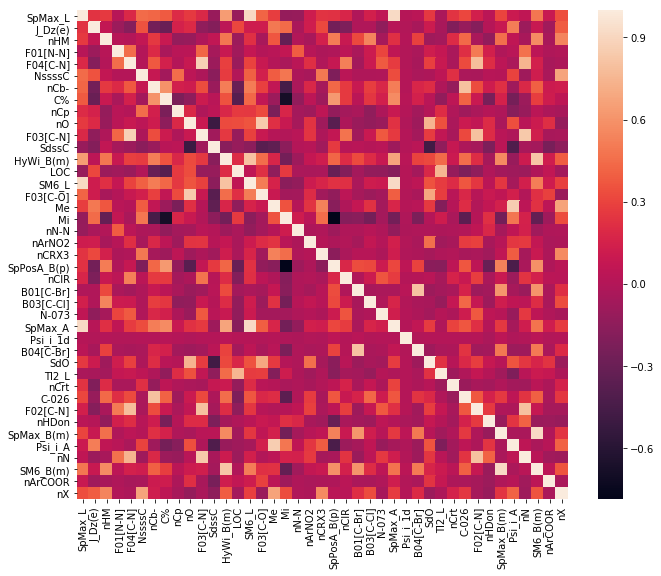

In [14]:
#Creating heatmap to understand correlations between variables
corr = biodeg.corr(method='pearson')
plt.subplots(figsize=(11,9))
sns.heatmap(corr)

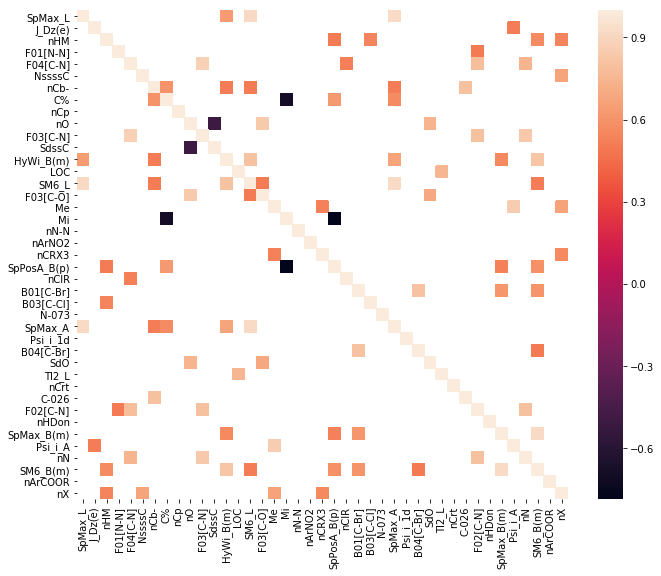

In [20]:
#The same heatmap with only strong correlations
plt.subplots(figsize=(11,9))
sns.heatmap(corr[abs(corr) > 0.5 ])